<a href="https://colab.research.google.com/github/SmartIsrael/Water_Quality_Prediction/blob/main/GROUP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Analysis - Group5 Project


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data_csv = './water_potability.csv'
df = pd.read_csv(data_csv)


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.shape

(3276, 10)

In [6]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [7]:
df = df.fillna(df.mean())

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There were so many null values in the original data set provided, instead of dropping the null values, I decided to replace them with the mean values of the column.

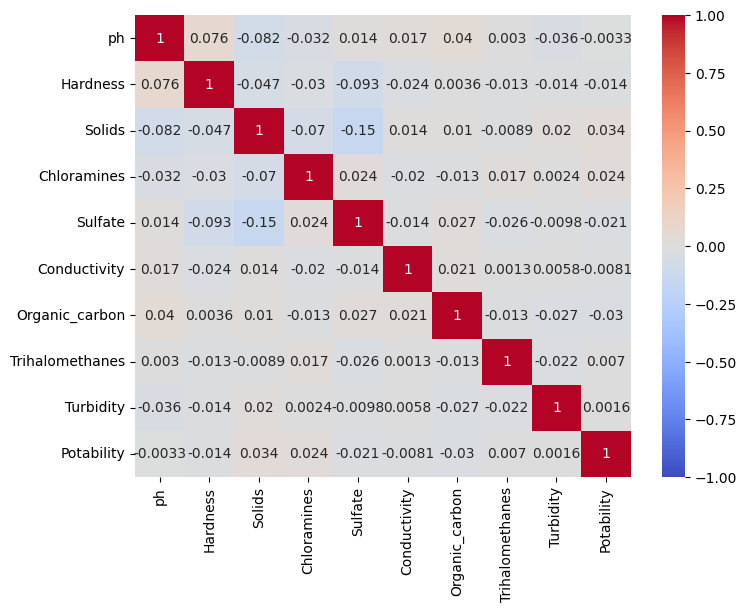

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

In [10]:
X = df.drop('Potability', axis=1)  # Features (independent variables)
y = df['Potability']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data

scaler.fit(X)
# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data (using the same scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)

# **Vanilla Model Implementation**
This section covers the implementation of the vanilla model that involves training the model using a plain architecture

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define the vanilla neural network model
vanilla_model = Sequential()

# Input layer and first hidden layer (64 units, ReLU activation)
vanilla_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer (32 units, ReLU activation)
vanilla_model.add(Dense(32, activation='relu'))

# Output layer (1 unit, Sigmoid activation for binary classification)
vanilla_model.add(Dense(1, activation='sigmoid'))

# Show model summary to check the architecture
vanilla_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
vanilla_model.compile(loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])


In [ ]:
# Train the model
history_vanilla = vanilla_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                                    validation_split=0.2, verbose=1)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 0.5009 - Precision: 0.4163 - Recall: 0.1780 - accuracy: 0.5803 - loss: 0.6823 - val_AUC: 0.5661 - val_Precision: 0.5897 - val_Recall: 0.1111 - val_accuracy: 0.6183 - val_loss: 0.6660
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - AUC: 0.6023 - Precision: 0.6871 - Recall: 0.1368 - accuracy: 0.6325 - loss: 0.6548 - val_AUC: 0.6258 - val_Precision: 0.6596 - val_Recall: 0.1498 - val_accuracy: 0.6336 - val_loss: 0.6499
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.6488 - Precision: 0.7167 - Recall: 0.1990 - accuracy: 0.6440 - loss: 0.6407 - val_AUC: 0.6516 - val_Precision: 0.7581 - val_Recall: 0.2271 - val_accuracy: 0.6660 - val_loss: 0.6392
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.6972 - Precision: 0.7750 - Recall: 0.2810 - accuracy: 0.6836 - loss: 0.6147 - val_AUC: 0.6640 - val_Precision: 0.7143 - val_Recall: 0.2415 - val_accuracy: 0.6622 - val_loss: 0.6304
Epoch 5/100
66/66 ━━━━━━━━━━━━━━

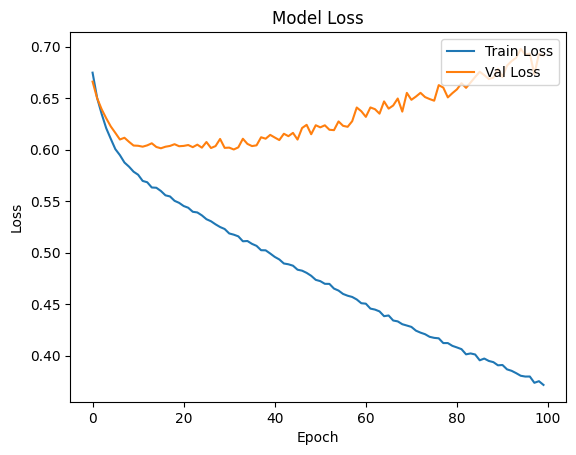

In [ ]:
# Plot training & validation loss
plt.plot(history_vanilla.history['loss'], label='Train Loss')
plt.plot(history_vanilla.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = vanilla_model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the test results
print(f'Vanilla Model Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print(f'Vanilla Model Test Precision: {test_precision}')
print(f'Vanilla Model Test Recall: {test_recall}')
print(f'Vanilla Model Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6661 - Precision: 0.5172 - Recall: 0.5100 - accuracy: 0.6552 - loss: 0.7385 
Vanilla Model Test Accuracy: 0.6478658318519592
Test Loss: 0.7264769673347473
Vanilla Model Test Precision: 0.5265306234359741
Vanilla Model Test Recall: 0.5286885499954224
Vanilla Model Test AUC: 0.6754834651947021


In [ ]:
# Save the trained model using Keras save method
vanilla_model.save('vanilla_model.h5')


# **L1 Regularization!**

In [ ]:
from tensorflow.keras.regularizers import l1 #importing l1 for regularization


l1_model = Sequential()

# Adding L1 regularization to the layers
# Input layer and first hidden layer
l1_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=l1(0.001)))

# Second hidden layer
l1_model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))


# Output layer
l1_model.add(Dense(1, activation='sigmoid'))

l1_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
l1_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC']) #compiling the model
l1_early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights
)
# Train the model
l1_model_fitted = l1_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
             callbacks=[l1_early_stopping], verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - AUC: 0.4859 - Precision: 0.3841 - Recall: 0.1941 - accuracy: 0.5659 - loss: 1.0116 - val_AUC: 0.5472 - val_Precision: 0.6667 - val_Recall: 0.0676 - val_accuracy: 0.6183 - val_loss: 0.9591
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6269 - Precision: 0.6303 - Recall: 0.0594 - accuracy: 0.6178 - loss: 0.9334 - val_AUC: 0.6042 - val_Precision: 0.7037 - val_Recall: 0.0918 - val_accuracy: 0.6260 - val_loss: 0.9040
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6637 - Precision: 0.7502 - Recall: 0.1435 - accuracy: 0.6344 - loss: 0.8806 - val_AUC: 0.6417 - val_Precision: 0.7778 - val_Recall: 0.1353 - val_accuracy: 0.6431 - val_loss: 0.8578
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6991 - Precision: 0.7660 - Recall: 0.2392 - accuracy: 0.6614 - loss: 0.8344 - val_AUC: 0.6625 - val_Precision: 0.8000 - val_Recall: 0.2126 - val_accuracy: 0.6679 - val_loss: 0.8185
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
l1_model.save('l1_water_quality_model.h5') #saving my model

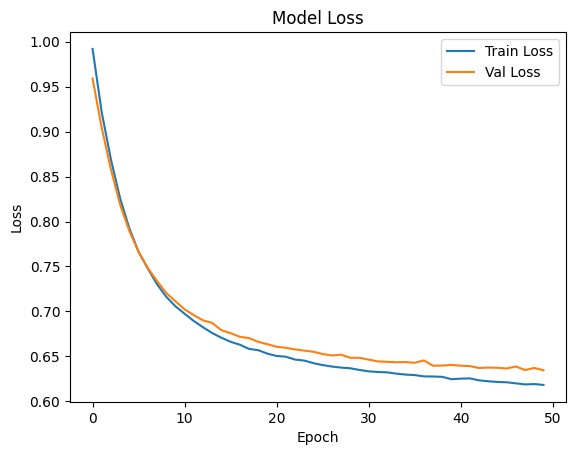

In [ ]:
# plotting training & validation loss
plt.plot(l1_model_fitted.history['loss'], label='Train Loss')
plt.plot(l1_model_fitted.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, test_accuracy, test_precision, test_recall, test_auc = l1_model.evaluate(X_test_scaled, y_test, verbose=1)

# test results
print(f'L1 Model Test Accuracy: {test_accuracy}')
print(f'Test Loss: {loss}')
print(f'L1 Model Test Precision: {test_precision}')
print(f'L1 Test Recall: {test_recall}')
print(f'L1 Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6811 - Precision: 0.5474 - Recall: 0.3487 - accuracy: 0.6642 - loss: 0.6351 
L1 Model Test Accuracy: 0.6737805008888245
Test Loss: 0.6324691772460938
L1 Model Test Precision: 0.59375
L1 Test Recall: 0.3893442749977112
L1 Test AUC: 0.6968555450439453


Even with L1 regularization, the model is not doing very great


# L2 Regularization


This section implements L2 regularization technique with an aim of improving our model's performance(higher accuracy, lower loss) as compared to the vanilla model and using L1 regularization.

In [ ]:
from tensorflow.keras.regularizers import l2



l2_model = Sequential()

# Adding L2 regularization to the layers
# Input layer and first hidden layer
l2_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=l2(0.01)))

# Second hidden layer
l2_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
l2_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

# Compile the model with additional metrics
l2_model.compile(optimizer=
                 optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC']) #compiling the model

l2_early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,
    restore_best_weights=True  # Restore the best weights
)

# Train the model
l2_model_fitted = l2_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,
                               callbacks=[l2_early_stopping], verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - AUC: 0.4974 - Precision: 0.3999 - Recall: 0.3131 - accuracy: 0.5428 - loss: 1.2000 - val_AUC: 0.5769 - val_Precision: 0.7143 - val_Recall: 0.0725 - val_accuracy: 0.6221 - val_loss: 1.0182
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6055 - Precision: 0.7387 - Recall: 0.1095 - accuracy: 0.6233 - loss: 0.9774 - val_AUC: 0.6069 - val_Precision: 0.8333 - val_Recall: 0.0483 - val_accuracy: 0.6202 - val_loss: 0.8804
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6224 - Precision: 0.8003 - Recall: 0.1208 - accuracy: 0.6488 - loss: 0.8469 - val_AUC: 0.6258 - val_Precision: 0.7674 - val_Recall: 0.1594 - val_accuracy: 0.6489 - val_loss: 0.7986
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6584 - Precision: 0.7429 - Recall: 0.1287 - accuracy: 0.6421 - loss: 0.7761 - val_AUC: 0.6469 - val_Precision: 0.7907 - val_Recall: 0.1643 - val_accuracy: 0.6527 - val_loss: 0.7466
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━

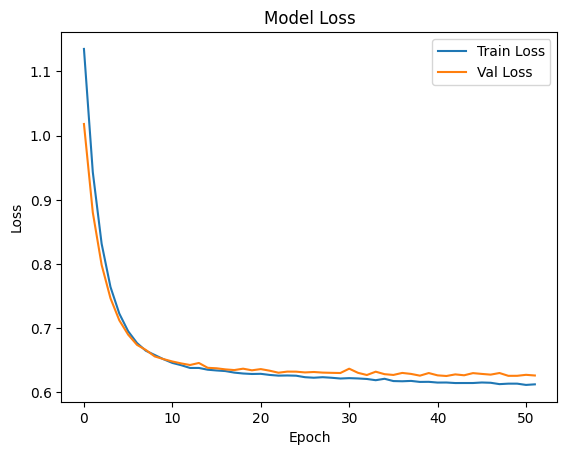

In [ ]:
# Plot training & validation loss
plt.plot(l2_model_fitted.history['loss'], label='Train Loss')
plt.plot(l2_model_fitted.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, test_accuracy, test_precision, test_recall, test_auc = l2_model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the test results
print(f'L2 Model Test Accuracy: {test_accuracy}')
print(f"Test Loss: {loss}")
print(f'L2 Model Test Precision: {test_precision}')
print(f'L2 Test Recall: {test_recall}')
print(f'L2 Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6916 - Precision: 0.6508 - Recall: 0.2949 - accuracy: 0.6918 - loss: 0.6160 
L2 Model Test Accuracy: 0.6935975551605225
Test Loss: 0.6175200939178467
L2 Model Test Precision: 0.6972476840019226
L2 Test Recall: 0.31147539615631104
L2 Test AUC: 0.699576199054718


In [ ]:
# saving our model using pickle
import pickle
pickle.dump(l2_model, open('l2_model.pkl', 'wb'))